In [1]:
import pandas as pd

import os

os.environ["CUDA_VISIBLE_DEVICES"] = "4"

import torch
import numpy as np
import pickle as pk

from tqdm import tqdm_notebook
from sklearn.metrics import cohen_kappa_score
from fastai.vision import *
from torch.nn import functional as F
from utils import *

In [2]:
current_time = get_BJ_time()
print(current_time)

0825_01-39-24


In [3]:
import random

def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
SEED = 2019
seed_everything(SEED)

deployment_dir = "../output/inference"

def qk(y_pred, y):
    k = torch.tensor(cohen_kappa_score(torch.round(y_pred), y, weights='quadratic'), device='cuda:0')
    k[k != k] = 0
    k[torch.isinf(k)] = 0
    
    return k

df_2019_cv = pd.read_csv('../input/aptos-data-split/df_2019_cv.csv')

In [4]:
df_2019_cv.head()

,id_code,diagnosis,path,is_valid1,is_valid2,is_valid3,is_valid4,is_valid5
0,000c1434d8d7,2,../input/aptos2019-blindness-detection/train_i...,True,False,False,False,False
1,001639a390f0,4,../input/aptos2019-blindness-detection/train_i...,True,False,False,False,False
2,0024cdab0c1e,1,../input/aptos2019-blindness-detection/train_i...,True,False,False,False,False
3,002c21358ce6,0,../input/aptos2019-blindness-detection/train_i...,True,False,False,False,False
4,005b95c28852,0,../input/aptos2019-blindness-detection/train_i...,True,False,False,False,False


In [5]:
test_df = pd.read_csv('../input/aptos2019-blindness-detection/sample_submission.csv')

# Feature Extraction

## Train logits

### b3

In [8]:
fold = 1
val_df = df_2019_cv[df_2019_cv["is_valid{}".format(fold)]]

learn = load_learner(deployment_dir, "efficientnet-b3_0819_22-37-22_stage2_f1.pkl")

learn.data.add_test(ImageList.from_df(val_df,
                                      '../input/aptos2019-blindness-detection',
                                      cols="id_code",
                                      folder='train_images_ben_preprocessing',
                                      suffix='.png'))

logits,_ = learn.get_preds(DatasetType.Test)

np.save("../output/stacking/b3_f{}_logits.npy".format(fold), logits)

print(logits.shape)

fold = 2
val_df = df_2019_cv[df_2019_cv["is_valid{}".format(fold)]]

learn = load_learner(deployment_dir, "efficientnet-b3_0819_22-37-22_stage2_f2.pkl")

learn.data.add_test(ImageList.from_df(val_df,
                                      '../input/aptos2019-blindness-detection',
                                      cols="id_code",
                                      folder='train_images_ben_preprocessing',
                                      suffix='.png'))

logits,_ = learn.get_preds(DatasetType.Test)

np.save("../output/stacking/b3_f{}_logits.npy".format(fold), logits)

print(logits.shape)

fold = 3
val_df = df_2019_cv[df_2019_cv["is_valid{}".format(fold)]]

learn = load_learner(deployment_dir, "efficientnet-b3_0819_22-37-22_stage2_f3.pkl")

learn.data.add_test(ImageList.from_df(val_df,
                                      '../input/aptos2019-blindness-detection',
                                      cols="id_code",
                                      folder='train_images_ben_preprocessing',
                                      suffix='.png'))

logits,_ = learn.get_preds(DatasetType.Test)

np.save("../output/stacking/b3_f{}_logits.npy".format(fold), logits)

print(logits.shape)


fold = 4
val_df = df_2019_cv[df_2019_cv["is_valid{}".format(fold)]]

learn = load_learner(deployment_dir, "efficientnet-b3_0819_22-37-22_stage2_f4.pkl")

learn.data.add_test(ImageList.from_df(val_df,
                                      '../input/aptos2019-blindness-detection',
                                      cols="id_code",
                                      folder='train_images_ben_preprocessing',
                                      suffix='.png'))

logits,_ = learn.get_preds(DatasetType.Test)

np.save("../output/stacking/b3_f{}_logits.npy".format(fold), logits)

print(logits.shape)

fold = 5
val_df = df_2019_cv[df_2019_cv["is_valid{}".format(fold)]]

learn = load_learner(deployment_dir, "efficientnet-b3_0820_05-48-25_stage2_f5.pkl")

learn.data.add_test(ImageList.from_df(val_df,
                                      '../input/aptos2019-blindness-detection',
                                      cols="id_code",
                                      folder='train_images_ben_preprocessing',
                                      suffix='.png'))

logits,_ = learn.get_preds(DatasetType.Test)

np.save("../output/stacking/b3_f{}_logits.npy".format(fold), logits)

print(logits.shape)

torch.Size([731, 1])


### b4

In [9]:
fold = 1
val_df = df_2019_cv[df_2019_cv["is_valid{}".format(fold)]]

learn = load_learner(deployment_dir, "efficientnet-b4_0820_01-09-57_stage2_f1.pkl")

learn.data.add_test(ImageList.from_df(val_df,
                                      '../input/aptos2019-blindness-detection',
                                      cols="id_code",
                                      folder='train_images_ben_preprocessing_sigmaX10',
                                      suffix='.png'))

logits,_ = learn.get_preds(DatasetType.Test)

np.save("../output/stacking/b4_f{}_logits.npy".format(fold), logits)

print(logits.shape)

fold = 2
val_df = df_2019_cv[df_2019_cv["is_valid{}".format(fold)]]

learn = load_learner(deployment_dir, "efficientnet-b4_0820_01-09-57_stage2_f2.pkl")

learn.data.add_test(ImageList.from_df(val_df,
                                      '../input/aptos2019-blindness-detection',
                                      cols="id_code",
                                      folder='train_images_ben_preprocessing_sigmaX10',
                                      suffix='.png'))

logits,_ = learn.get_preds(DatasetType.Test)

np.save("../output/stacking/b4_f{}_logits.npy".format(fold), logits)

print(logits.shape)


fold = 3
val_df = df_2019_cv[df_2019_cv["is_valid{}".format(fold)]]

learn = load_learner(deployment_dir, "efficientnet-b4_0820_01-09-57_stage2_f3.pkl")

learn.data.add_test(ImageList.from_df(val_df,
                                      '../input/aptos2019-blindness-detection',
                                      cols="id_code",
                                      folder='train_images_ben_preprocessing_sigmaX10',
                                      suffix='.png'))

logits,_ = learn.get_preds(DatasetType.Test)

np.save("../output/stacking/b4_f{}_logits.npy".format(fold), logits)

print(logits.shape)


fold = 4
val_df = df_2019_cv[df_2019_cv["is_valid{}".format(fold)]]

learn = load_learner(deployment_dir, "efficientnet-b4_0820_01-09-57_stage2_f4.pkl")

learn.data.add_test(ImageList.from_df(val_df,
                                      '../input/aptos2019-blindness-detection',
                                      cols="id_code",
                                      folder='train_images_ben_preprocessing_sigmaX10',
                                      suffix='.png'))

logits,_ = learn.get_preds(DatasetType.Test)

np.save("../output/stacking/b4_f{}_logits.npy".format(fold), logits)

print(logits.shape)


fold = 5
val_df = df_2019_cv[df_2019_cv["is_valid{}".format(fold)]]

learn = load_learner(deployment_dir, "efficientnet-b4_0821_00-02-25_stage2_f5.pkl")

learn.data.add_test(ImageList.from_df(val_df,
                                      '../input/aptos2019-blindness-detection',
                                      cols="id_code",
                                      folder='train_images_ben_preprocessing_sigmaX10',
                                      suffix='.png'))

logits,_ = learn.get_preds(DatasetType.Test)

np.save("../output/stacking/b4_f{}_logits.npy".format(fold), logits)

print(logits.shape)

torch.Size([731, 1])


### b5

In [10]:
fold = 1
val_df = df_2019_cv[df_2019_cv["is_valid{}".format(fold)]]

learn = load_learner(deployment_dir, "efficientnet-b5_0820_01-32-30_stage2_f1.pkl")

learn.data.add_test(ImageList.from_df(val_df,
                                      '../input/aptos2019-blindness-detection',
                                      cols="id_code",
                                      folder='train_images_ben_preprocessing_sigmaX10',
                                      suffix='.png'))

logits,_ = learn.get_preds(DatasetType.Test)

np.save("../output/stacking/b5_f{}_logits.npy".format(fold), logits)

print(logits.shape)


fold = 2
val_df = df_2019_cv[df_2019_cv["is_valid{}".format(fold)]]

learn = load_learner(deployment_dir, "efficientnet-b5_0820_22-13-07_stage2_f2.pkl")

learn.data.add_test(ImageList.from_df(val_df,
                                      '../input/aptos2019-blindness-detection',
                                      cols="id_code",
                                      folder='train_images_ben_preprocessing_sigmaX10',
                                      suffix='.png'))

logits,_ = learn.get_preds(DatasetType.Test)

np.save("../output/stacking/b5_f{}_logits.npy".format(fold), logits)

print(logits.shape)

fold = 3
val_df = df_2019_cv[df_2019_cv["is_valid{}".format(fold)]]

learn = load_learner(deployment_dir, "efficientnet-b5_0820_22-13-07_stage2_f3.pkl")

learn.data.add_test(ImageList.from_df(val_df,
                                      '../input/aptos2019-blindness-detection',
                                      cols="id_code",
                                      folder='train_images_ben_preprocessing_sigmaX10',
                                      suffix='.png'))

logits,_ = learn.get_preds(DatasetType.Test)

np.save("../output/stacking/b5_f{}_logits.npy".format(fold), logits)

print(logits.shape)

fold = 4
val_df = df_2019_cv[df_2019_cv["is_valid{}".format(fold)]]

learn = load_learner(deployment_dir, "efficientnet-b5_0821_01-30-37_stage2_f4.pkl")

learn.data.add_test(ImageList.from_df(val_df,
                                      '../input/aptos2019-blindness-detection',
                                      cols="id_code",
                                      folder='train_images_ben_preprocessing_sigmaX10',
                                      suffix='.png'))

logits,_ = learn.get_preds(DatasetType.Test)

np.save("../output/stacking/b5_f{}_logits.npy".format(fold), logits)

print(logits.shape)

fold = 5
val_df = df_2019_cv[df_2019_cv["is_valid{}".format(fold)]]

learn = load_learner(deployment_dir, "efficientnet-b5_0821_00-26-51_stage2_f5.pkl")

learn.data.add_test(ImageList.from_df(val_df,
                                      '../input/aptos2019-blindness-detection',
                                      cols="id_code",
                                      folder='train_images_ben_preprocessing_sigmaX10',
                                      suffix='.png'))

logits,_ = learn.get_preds(DatasetType.Test)

np.save("../output/stacking/b5_f{}_logits.npy".format(fold), logits)

print(logits.shape)

torch.Size([731, 1])


## Test Feature

### Average

#### b3

In [33]:
b3_models = ["efficientnet-b3_0819_22-37-22_stage2_f1", "efficientnet-b3_0819_22-37-22_stage2_f2", 
             "efficientnet-b3_0819_22-37-22_stage2_f3", "efficientnet-b3_0819_22-37-22_stage2_f4",
            "efficientnet-b3_0820_05-48-25_stage2_f5"]

b3_test_logits_list = []
for m in tqdm_notebook(b3_models):
    learn = load_learner(deployment_dir, "{}.pkl".format(m))

    learn.data.add_test(ImageList.from_df(test_df,
                                      '../input/aptos2019-blindness-detection',
                                      folder='test_images_ben_preprocessing',
                                      suffix='.png'))

    logits,_ = learn.get_preds(DatasetType.Test)
    b3_test_logits_list.append(logits.numpy())
    
# np.save("../output/stacking/b3_test_feats.npy", b3_test_feats)
# print(b3_test_feats.shape)

#### b4

In [34]:
b4_models = ["efficientnet-b4_0820_01-09-57_stage2_f1", "efficientnet-b4_0820_01-09-57_stage2_f2", 
             "efficientnet-b4_0820_01-09-57_stage2_f3", "efficientnet-b4_0820_01-09-57_stage2_f4",
            "efficientnet-b4_0821_00-02-25_stage2_f5"]

b4_test_logits_list = []
for m in tqdm_notebook(b4_models):
    learn = load_learner(deployment_dir, "{}.pkl".format(m))

    learn.data.add_test(ImageList.from_df(test_df,
                                      '../input/aptos2019-blindness-detection',
                                      folder='test_images_ben_preprocessing_sigmaX10',
                                      suffix='.png'))

    logits,_ = learn.get_preds(DatasetType.Test)
    b4_test_logits_list.append(logits.numpy())
    
# np.save("../output/stacking/b4_test_feats.npy", b4_test_feats)

# print(b4_test_feats.shape)

#### b5

In [35]:
b5_models = ["efficientnet-b5_0820_01-32-30_stage2_f1", "efficientnet-b5_0820_22-13-07_stage2_f2", 
             "efficientnet-b5_0820_22-13-07_stage2_f3", "efficientnet-b5_0821_01-30-37_stage2_f4",
            "efficientnet-b5_0821_00-26-51_stage2_f5"]

b5_test_logits_list = []
for m in tqdm_notebook(b5_models):
    learn = load_learner(deployment_dir, "{}.pkl".format(m))

    learn.data.add_test(ImageList.from_df(test_df,
                                      '../input/aptos2019-blindness-detection',
                                      folder='test_images_ben_preprocessing_sigmaX10',
                                      suffix='.png'))
    logits,_ = learn.get_preds(DatasetType.Test)
    b5_test_logits_list.append(logits.numpy())
    
# np.save("../output/stacking/b5_test_feats.npy", b5_test_feats)

# print(b5_test_feats.shape)

### Retrain

#### b3

In [37]:
learn = load_learner(deployment_dir, "efficientnet-b3_0823_05-02-32_stage2_whole.pkl")

learn.data.add_test(ImageList.from_df(test_df,
                                  '../input/aptos2019-blindness-detection',
                                  folder='test_images_ben_preprocessing',
                                  suffix='.png'))

logits,_ = learn.get_preds(DatasetType.Test)
b3_test_logits = logits.numpy()
            
# feats_arr = np.concatenate(feats_list, axis=0)
# #     b3_test_feats.append(feats_arr)
    
# # b3_test_feats = np.average(b3_test_feats, axis=0)
# np.save("../output/stacking/b3_retrain_test_feats.npy", b3_test_feats)
# b3_test_feats = feats_arr
# print(b3_test_feats.shape)

#### b4

In [38]:
b4_test_feats = []
learn = load_learner(deployment_dir, "efficientnet-b4_0823_18-14-19_stage2_whole.pkl")

learn.data.add_test(ImageList.from_df(test_df,
                                  '../input/aptos2019-blindness-detection',
                                  folder='test_images_ben_preprocessing_sigmaX10',
                                  suffix='.png'))

logits,_ = learn.get_preds(DatasetType.Test)
b4_test_logits = logits.numpy()

#### b5

In [39]:
b5_test_feats = []
learn = load_learner(deployment_dir, "efficientnet-b5_0823_18-21-16_stage2_whole.pkl")

learn.data.add_test(ImageList.from_df(test_df,
                                  '../input/aptos2019-blindness-detection',
                                  folder='test_images_ben_preprocessing_sigmaX10',
                                  suffix='.png'))

logits,_ = learn.get_preds(DatasetType.Test)
b5_test_logits = logits.numpy()

# Train Stage 2 model on OOF

In [11]:
import lightgbm as lgb

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

In [12]:
def qk_np(y, y_pred):
    k = cohen_kappa_score(np.round(y_pred), y, weights='quadratic')
    
    return k

score = make_scorer(qk_np, greater_is_better=True)

In [13]:
stacking_dir = "../output/stacking"
X_train = []
y_train = []
n_fold = 5

for i in range(1, n_fold+1):
    data_t = []
    for j in ['b3_f{}_logits.npy', 'b4_f{}_logits.npy', 'b5_f{}_logits.npy']:
#     for j in ['b4_f{}_feats.npy', 'b5_f{}_feats.npy']:
        data_t.append(np.load(os.path.join(stacking_dir, j.format(i))))
    data_t = np.concatenate(data_t, axis=1)
    X_train.append(data_t)
    
    label_t = df_2019_cv[df_2019_cv["is_valid{}".format(i)]]["diagnosis"].tolist()
    y_train += label_t
    
X_train = np.concatenate(X_train, axis=0)
print(X_train.shape)

(3662, 3)


## LightGBM 

In [43]:
estimator = lgb.LGBMRegressor(n_jobs=8, random_state=SEED)

param_grid = {
    'max_depth': [3, 5, 7, 9, 12, 15, 17, 25],   
#     'max_depth': [20],
    'learning_rate': [0.01, 0.02, 0.05, 0.1, 0.15],    
#     'learning_rate': [0.1],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1]
}

gbm = GridSearchCV(estimator, param_grid, cv=5, n_jobs=16, scoring=score, verbose=1)
# gbm.fit(X_train_normalized, y_train)
gbm.fit(X_train, y_train)

print('Best parameters found by grid search are:', gbm.best_params_)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   29.5s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:  3.0min
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:  7.0min
[Parallel(n_jobs=16)]: Done 768 tasks      | elapsed: 12.6min


Best parameters found by grid search are: {'colsample_bytree': 0.6, 'learning_rate': 0.05, 'max_depth': 3}


[Parallel(n_jobs=16)]: Done 1000 out of 1000 | elapsed: 16.4min finished


In [44]:
gbm.cv_results_   

{'mean_fit_time': array([ 4.849414, 18.154822, 17.912222, 42.529978, ..., 14.327356, 14.003707,  5.92747 ,  5.28735 ]),
 'std_fit_time': array([ 4.456552,  9.94717 , 10.821613, 21.439846, ...,  6.320781,  4.808215,  3.73904 ,  2.031554]),
 'mean_score_time': array([0.050642, 0.041756, 0.032115, 0.027708, ..., 0.032546, 0.014318, 0.002743, 0.00288 ]),
 'std_score_time': array([0.042909, 0.032313, 0.02562 , 0.021922, ..., 0.032734, 0.017667, 0.000171, 0.000296]),
 'param_colsample_bytree': masked_array(data=[0.6, 0.6, 0.6, 0.6, ..., 1, 1, 1, 1],
              mask=[False, False, False, False, ..., False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_learning_rate': masked_array(data=[0.01, 0.01, 0.01, 0.01, ..., 0.15, 0.15, 0.15, 0.15],
              mask=[False, False, False, False, ..., False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(data=[3, 5, 7, 9, ..., 12, 15, 17, 25],
            

In [46]:
gbm.best_score_

0.9252905940253487

In [45]:
qk_np(y_train, gbm.predict(X_train))

0.929257811888011

In [48]:
model_save_name = "lightgbm-{}".format(current_time)

with open(os.path.join(deployment_dir, model_save_name+".pkl"), "wb") as f:
    pk.dump(lr.best_estimator_, f)

print(model_save_name)

lightgbm-0825_01-39-24


In [ ]:
with open(model_save_name, "rb") as f:
    gbm = pk.load(f)

## LogisticRegression 

In [14]:
from sklearn.linear_model import LogisticRegression

In [22]:
estimator = LogisticRegression(n_jobs=8, random_state=SEED, multi_class="auto")

param_grid = {
#     'penalty': ['l1', 'l2'],    
    'penalty': ['l2'],
#     'C': [0.1],    
    'solver': ['newton-cg', 'sag', 'saga', 'lbfgs', 'liblinear'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100]

}

lr = GridSearchCV(estimator, param_grid, cv=5, n_jobs=16, scoring=score, verbose=1)
lr.fit(X_train, y_train)
# lr.fit(X_train_normalized, y_train)


print('Best parameters found by grid search are:', lr.best_params_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    2.0s
[Parallel(n_jobs=16)]: Done 150 out of 150 | elapsed:    3.8s finished


Best parameters found by grid search are: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}


In [23]:
lr.cv_results_   

{'mean_fit_time': array([0.184214, 0.10384 , 0.10424 , 0.104225, 0.016276, 0.267424, 0.105932, 0.106796, 0.108019, 0.01922 , 0.288998,
        0.109907, 0.126005, 0.205471, 0.02281 , 0.325702, 0.104888, 0.164929, 0.204552, 0.022554, 0.348478, 0.105848,
        0.207023, 0.227363, 0.023285, 0.289444, 0.128725, 0.205394, 0.204973, 0.022929]),
 'std_fit_time': array([7.528333e-02, 1.083672e-04, 8.151218e-04, 3.658203e-04, 2.354558e-03, 1.377955e-01, 1.671756e-03, 9.716939e-04,
        2.899900e-03, 3.758559e-03, 4.166562e-02, 4.070447e-03, 4.019686e-02, 8.043666e-04, 4.700484e-03, 4.026182e-02,
        1.112540e-03, 4.953269e-02, 5.234524e-04, 1.482211e-03, 1.380742e-01, 2.206775e-03, 1.970759e-03, 3.868334e-02,
        1.812874e-03, 3.733342e-02, 3.888921e-02, 9.880343e-04, 6.582888e-04, 3.417805e-03]),
 'mean_score_time': array([0.002485, 0.003804, 0.003872, 0.002858, 0.001483, 0.003583, 0.003031, 0.002833, 0.002573, 0.001474, 0.002808,
        0.002417, 0.002697, 0.003063, 0.001571, 0.

In [24]:
lr.best_score_

0.9171758732318603

In [25]:
qk_np(y_train, lr.predict(X_train))

0.9170356613996113

In [26]:
model_save_name = "lr-{}".format(current_time)

with open(os.path.join(deployment_dir, model_save_name+".pkl"), "wb") as f:
    pk.dump(lr.best_estimator_, f)

print(model_save_name)

lr-0825_01-39-24


# Test

## LightGBM 

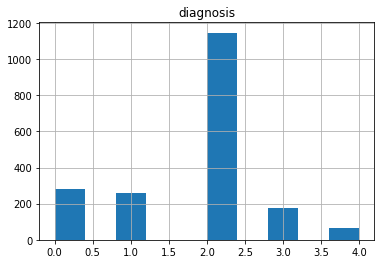

lightgbm-0825_01-39-24-retrain_feature_test.csv


In [49]:
X_test = np.concatenate([b3_test_logits, b4_test_logits, b5_test_logits], axis=1)
X_test.shape
y_pred = gbm.predict(X_test)

y_pred = np.round(y_pred)


test_df.diagnosis = y_pred.astype(int)

test_df.hist()
plt.show()

submition_filename = "{}-retrain_feature_test.csv".format(model_save_name)
test_df.to_csv(submition_filename,index=False)
print(submition_filename)

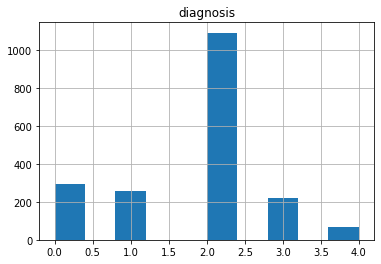

lightgbm-0825_01-39-24-5-fold_avg_logits_test.csv


In [50]:

b3_test_avg_feats = np.average(b3_test_logits_list, axis=0)
b4_test_avg_feats = np.average(b4_test_logits_list, axis=0)
b5_test_avg_feats = np.average(b5_test_logits_list, axis=0)


X_test = np.concatenate([b3_test_avg_feats, b4_test_avg_feats, b5_test_avg_feats], axis=1)
y_pred = gbm.predict(X_test)

y_pred = np.round(y_pred)

test_df.diagnosis = y_pred.astype(int)

test_df.hist()
plt.show()

submition_filename = "{}-5-fold_avg_logits_test.csv".format(model_save_name)
test_df.to_csv(submition_filename, index=False)
print(submition_filename)

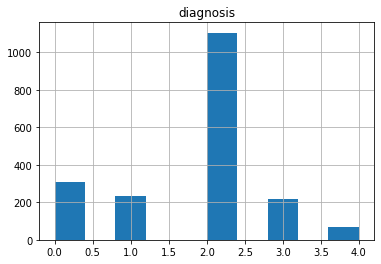

lightgbm-0825_01-39-24-5-fold_logits_avg_test.csv


In [54]:
# 5 test feature then avg
results = []
for b3, b4, b5 in zip(b3_test_logits_list, b4_test_logits_list, b5_test_logits_list):
    X_test = np.concatenate([b3, b4, b5], axis=1)
    res = gbm.predict(X_test)
    results.append(res)

avg_res = np.average(results, axis=0)
y_pred = np.round(avg_res)

test_df.diagnosis = y_pred.astype(int)

test_df.hist()
plt.show()

submition_filename = "{}-5-fold_logits_avg_test.csv".format(model_save_name)
test_df.to_csv(submition_filename, index=False)
print(submition_filename)

## LogisticRegression 

### Retrain feature test

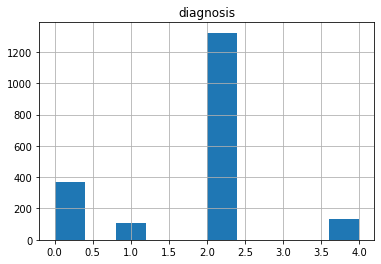

lr-0825_01-39-24-retrain_feature_test.csv


In [41]:
X_test = np.concatenate([b3_test_logits, b4_test_logits, b5_test_logits], axis=1)
X_test.shape
y_pred = lr.predict(X_test)


test_df.diagnosis = y_pred.astype(int)

test_df.hist()
plt.show()

submition_filename = "{}-retrain_feature_test.csv".format(model_save_name)
test_df.to_csv(submition_filename,index=False)
print(submition_filename)

### 5-fold avg feature test

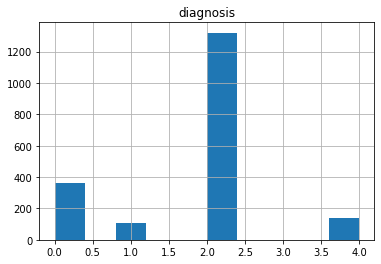

lr-0825_01-39-24-5-fold_avg_logits_test.csv


In [36]:

b3_test_avg_feats = np.average(b3_test_logits_list, axis=0)
b4_test_avg_feats = np.average(b4_test_logits_list, axis=0)
b5_test_avg_feats = np.average(b5_test_logits_list, axis=0)


X_test = np.concatenate([b3_test_avg_feats, b4_test_avg_feats, b5_test_avg_feats], axis=1)
y_pred = lr.predict(X_test)

test_df.diagnosis = y_pred.astype(int)

test_df.hist()
plt.show()

submition_filename = "{}-5-fold_avg_logits_test.csv".format(model_save_name)
test_df.to_csv(submition_filename, index=False)
print(submition_filename)

### 5-fold avg logits test

In [ ]:
# 5 test feature then avg
results = []
for b3, b4, b5 in zip(b3_test_feats_list, b4_test_feats_list, b5_test_feats_list):
    X_test = np.concatenate([b3, b4, b5], axis=1)
    res = lr.predict_proba(X_test)
    results.append(res)

avg_res = np.average(results, axis=0)
y_pred = np.argmax(avg_res, axis=1)

test_df.diagnosis = y_pred.astype(int)

test_df.hist()
plt.show()

submition_filename = "{}-5-fold_avg_logits_test.csv".format(model_save_name)
test_df.to_csv(submition_filename, index=False)
print(submition_filename)